In [1]:
import tempfile, subprocess, urllib.request, zipfile
import pandas as pd, numpy as np
import datetime
%matplotlib inline
from diagnose import diagnose

## charger des données et quelques mises en forme

In [2]:
with tempfile.TemporaryDirectory() as tmpdir:
    urllib.request.urlretrieve(
        'http://files.grouplens.org/datasets/movielens/ml-20m.zip',
        tmpdir + '/ml-20m.zip')
    zipfile.ZipFile(tmpdir + '/ml-20m.zip').extractall(tmpdir)
    print(subprocess.check_output(['ls', tmpdir+'/ml-20m']).decode('utf-8'))
    
    interactions = pd.read_csv(
        tmpdir + '/ml-20m/ratings.csv',
    ).rename({
        'userId':'USER_ID', 'movieId':'ITEM_ID', 'timestamp':'TIMESTAMP'
    }, axis=1)

    items = pd.read_csv(
        tmpdir + '/ml-20m/movies.csv',
        encoding='latin1',
    ).rename({
        'movieId':'ITEM_ID'
    }, axis=1)

genome-scores.csv
genome-tags.csv
links.csv
movies.csv
ratings.csv
README.txt
tags.csv



## afficher le modèle de données

In [3]:
interactions.head()

,USER_ID,ITEM_ID,rating,TIMESTAMP
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [4]:
items.head()

,ITEM_ID,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## lancer les diagnostics

########################################
# DIAGNOSING INTERACTIONS TABLE, SAMPLE:
########################################
          USER_ID  ITEM_ID  rating   TIMESTAMP
3514111     23960      485     1.5  1115163292
4094437     27854     3578     3.5  1228960917
15516049   107307      367     3.0   850121631
5636665     38798     1263     4.0  1400987438
10288798    71170     5876     3.5  1105714991
9155663     63254      173     2.5  1197241543
8137693     56063     1380     3.0   974806310
6600844     45412     1747     4.5  1349486433
5160635     35313      541     4.5  1213670006
8958830     61929     6350     4.5  1328492321

=== Interactions table, original shape=(20000263, 4) ===

missing rate in fields ['USER_ID', 'ITEM_ID', 'TIMESTAMP'] 0.0
dropna shape (20000263, 4)
duplication rate 0.0
drop_duplicates shape (20000263, 4)
user item repeat rate 0.0

=== Describe interactions table ===

             rating     TIMESTAMP
count  2.000026e+07  2.000026e+07
mean   3.525529e+00  1

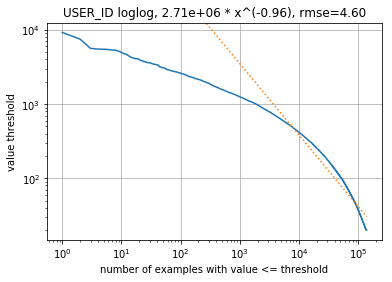


=== ITEM_ID top 10 categories ===
296     67310
356     66172
318     63366
593     63299
480     59715
260     54502
110     53769
589     52244
2571    51334
527     50054
dtype: int64


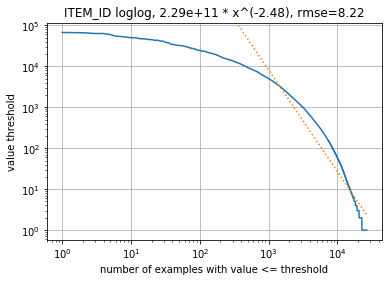


=== Hourly activity pattern ===
0      946689
1      891222
2      893318
3      880206
4      761767
5      693646
6      640515
7      582846
8      552690
9      519421
10     524195
11     546619
12     613826
13     691889
14     786165
15     879910
16     958747
17    1007302
18    1087910
19    1144854
20    1157567
21    1163521
22    1083166
23     992272
dtype: int64

=== Day of week activity pattern ===
0    3114661
1    3084949
2    2865378
3    2696561
4    2710068
5    2626447
6    2902199
dtype: int64


/home/yifeim/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


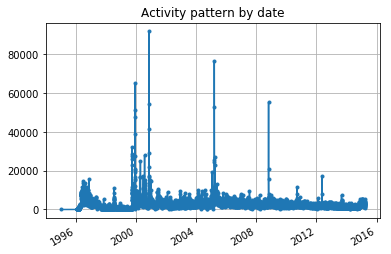

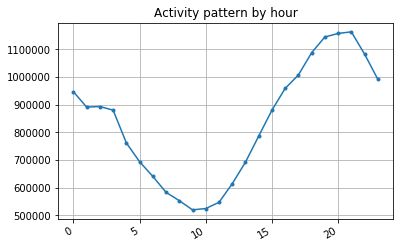

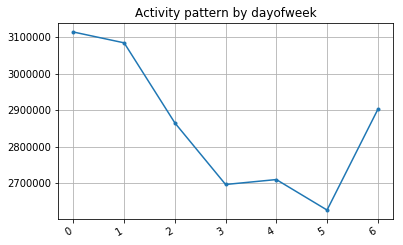


=== Temporal shift analysis ===

temporal total variation, freq=5d, hist_len=0, avg_loss=30.0%, time=33.1s
temporal total variation, freq=5d, hist_len=1, avg_loss=24.0%, time=27.9s
temporal total variation, freq=5d, hist_len=10, avg_loss=20.7%, time=29.0s
temporal total variation, freq=5d, hist_len=100, avg_loss=25.2%, time=29.7s
temporal total variation, freq=5d, hist_len=1000, avg_loss=38.0%, time=30.3s


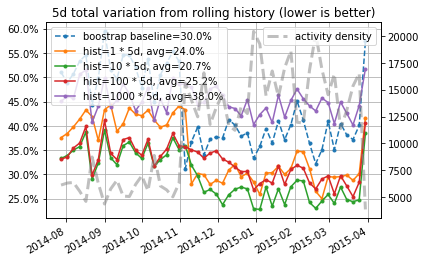

temporal total variation, freq=1d, hist_len=0, avg_loss=51.7%, time=37.4s
temporal total variation, freq=1d, hist_len=1, avg_loss=42.7%, time=32.1s
temporal total variation, freq=1d, hist_len=10, avg_loss=35.3%, time=33.8s
temporal total variation, freq=1d, hist_len=100, avg_loss=36.4%, time=39.6s
temporal total variation, freq=1d, hist_len=1000, avg_loss=41.0%, time=45.8s


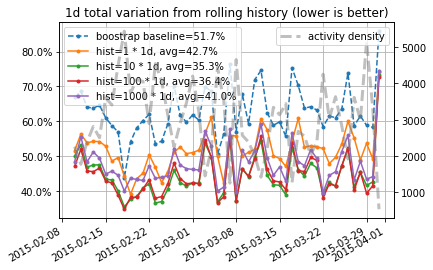

temporal total variation, freq=3h, hist_len=0, avg_loss=78.8%, time=43.8s
temporal total variation, freq=3h, hist_len=1, avg_loss=72.0%, time=37.5s
temporal total variation, freq=3h, hist_len=10, avg_loss=63.1%, time=46.5s
temporal total variation, freq=3h, hist_len=100, avg_loss=62.5%, time=76.2s
temporal total variation, freq=3h, hist_len=1000, avg_loss=63.6%, time=134.1s


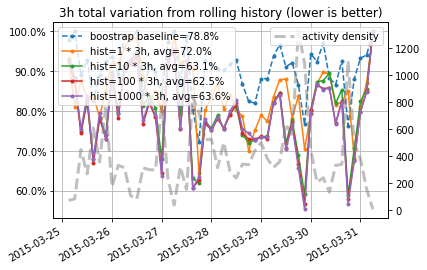


=== session time delta describe ===
count    1.986177e+07
mean     1.184378e+05
std      2.127205e+06
min      0.000000e+00
25%      3.000000e+00
50%      1.100000e+01
75%      3.600000e+01
max      4.645970e+08
Name: TIMESTAMP, dtype: float64


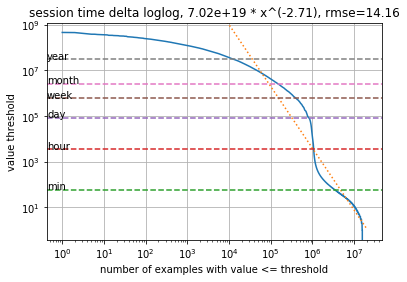

=== user time span describe ===
count    1.384930e+05
mean     1.698559e+07
std      5.423238e+07
min      0.000000e+00
25%      8.980000e+02
50%      3.398000e+03
75%      2.641789e+06
max      5.534154e+08
Name: TIMESTAMP, dtype: float64


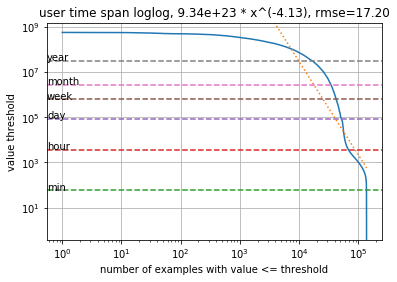

########################################
# USERS TABLE NOT FOUND
########################################
########################################
# DIAGNOSING ITEMS TABLE, SAMPLE:
########################################
       ITEM_ID                                              title  \
10005    32917                               Boccaccio '70 (1962)   
14602    73031  Too Shy to Try (Je suis timide... mais je me s...   
21198   103269                               Unconditional (2012)   
20557   100611                    Escape from Planet Earth (2013)   
15210    77667                                   MacGruber (2010)   
9259     27274                                 Cremaster 2 (1999)   
21283   103543                              Lifeguard, The (2013)   
22713   108758                     Temptation (TentaÃ§Ã£o) (1997)   
8805     26375                               Silver Streak (1976)   
21005   102487                       Man with a Cloak, The (1951)   

                  

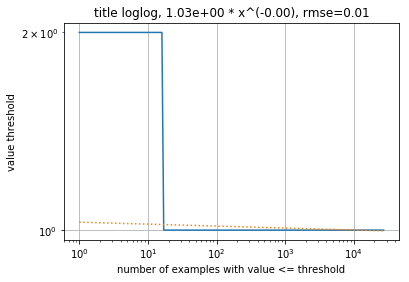


=== genres top 10 categories ===
Drama          13344
Comedy          8374
Thriller        4178
Romance         4127
Action          3520
Crime           2939
Horror          2611
Documentary     2471
Adventure       2329
Sci-Fi          1743
dtype: int64
CREATION_TIMESTAMP not found in items table


/local/home/yifeim/g/amazon-personalize-samples/diagnose/diagnose.py:74: UserWarning: 
            Heavy-tail title distributions are usually hard to learn (slope=-0.0029748976193251604)!
            Consider rolling up title or dropping its rare values.
            
  """.format(name, slope))


In [5]:
diagnose(interactions, None, items)